In [1]:
import pathlib
import xlsxwriter
import datetime
import time
from collections import OrderedDict
from skimage.filters import threshold_mean
from skimage.filters import threshold_otsu
from skimage.measure import regionprops, label
from skimage.morphology import closing, opening, disk
from skimage.segmentation import clear_border
from skimage.color import label2rgb
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import patches

In [2]:
%matplotlib inline

In [3]:
colors_li = [plt.cm.get_cmap('hsv', 30)(i) for i in range(30)]

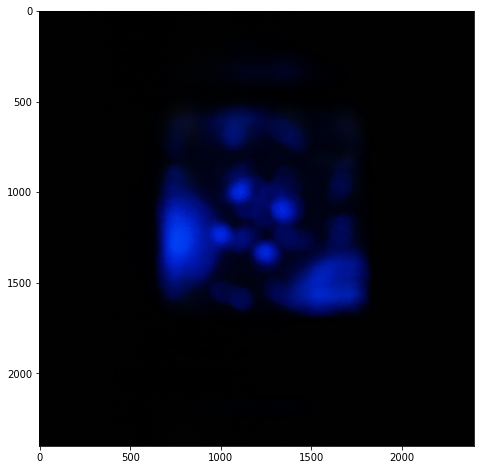

In [4]:
im_path = r"F:\device\optics\images\190618_100장\Desktop\백주임님용\fam,p=1.jpg"
im = np.array(Image.open(im_path))
plt.figure(figsize=(8,8))
plt.imshow(im)

In [5]:
im_gray = im.sum(axis=2)
cleared = clear_border(im_gray)
# thresh = threshold_otsu(cleared)
thresh = threshold_mean(cleared)
threshed_im = im_gray > thresh

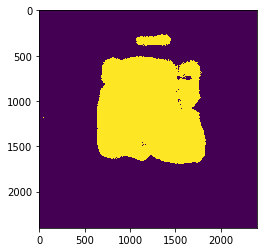

In [6]:
plt.imshow(threshed_im)

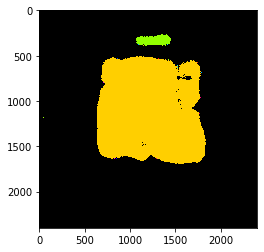

In [7]:
im_labeled = label(threshed_im)
image_label_overlay = label2rgb(im_labeled, bg_label=0, colors=colors_li)
plt.imshow(image_label_overlay)

In [8]:
region_dic = {}
for region in regionprops(im_labeled, intensity_image=im_gray):
    region_dic[region.area] = region
areas_li = sorted(list(region_dic.keys()), reverse=True)

In [9]:
region_well = region_dic[areas_li[0]]
minr, minc, maxr, maxc = region_well.bbox

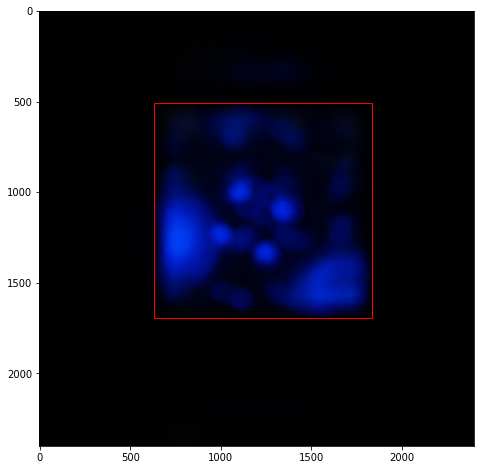

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(im)
rect = patches.Rectangle((minc, minr), maxc-minc, maxr-minr, edgecolor=colors_li[0], facecolor='none')
ax.add_patch(rect)


In [11]:
row_name = list('ABCD')
col_name = range(1, 5)

In [12]:
x_li = np.linspace(minc, maxc, 5, endpoint=True)
y_li = np.linspace(minr-50, maxr-50, 5, endpoint=True)
pts_li = [(x, y) for x in x_li for y in y_li]
grid = {}
for ind in range(19):
    i, j = divmod(ind, 5)
    if j == 4:
        continue
    top_left_pt = pts_li[ind]
    bottom_right_pt = pts_li[ind+6]
    well = row_name[j] + str(col_name[i])
    grid[well] = [top_left_pt[1], top_left_pt[0],
                  bottom_right_pt[1], bottom_right_pt[0]]

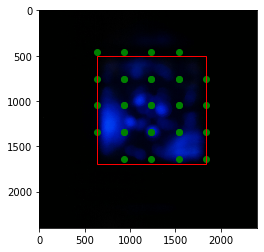

In [13]:
fig, ax = plt.subplots()
ax.imshow(im)
rect = patches.Rectangle((minc, minr), maxc-minc, maxr-minr, edgecolor='red', facecolor='none')
ax.add_patch(rect)
for pts in grid.values():
    ax.scatter(pts[1], pts[0], c='g')
    ax.scatter(pts[3], pts[2], c='g')

In [14]:
im_path = r"F:\device\optics\images\190618_100장\Desktop\백주임님용\fam,p=1.jpg"
im = np.array(Image.open(im_path))
im_gray = im.sum(axis=2)
cleared = clear_border(im_gray)
thresh = threshold_mean(cleared)
threshed_im = im_gray > thresh
im_labeled = label(threshed_im)
region_dic = {}
for region in regionprops(im_labeled, intensity_image=im_gray):
    region_dic[region.area] = region
areas_li = sorted(list(region_dic.keys()), reverse=True)
region_well = region_dic[areas_li[0]]
minr, minc, maxr, maxc = region_well.bbox
x_li = np.linspace(minc, maxc, 5, endpoint=True)
y_li = np.linspace(minr, maxr, 5, endpoint=True)
pts_li = [(x, y) for x in x_li for y in y_li]
grid = {}
for ind in range(19):
    i, j = divmod(ind, 5)
    if j == 4:
        continue
    top_left_pt = pts_li[ind]
    bottom_right_pt = pts_li[ind+6]
    well = row_name[j] + str(col_name[i])
    grid[well] = [top_left_pt[1], top_left_pt[0],
                  bottom_right_pt[1], bottom_right_pt[0]]

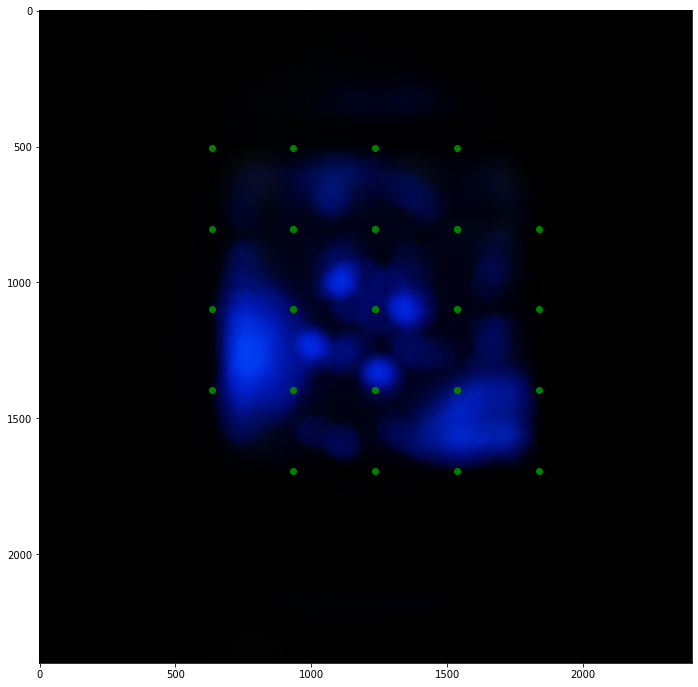

In [15]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(im)
# rect = patches.Rectangle((minc-50, minr-50), maxc-minc+50, maxr-minc, edgecolor='red', facecolor='none')
# ax.add_patch(rect)
for pts in grid.values():
    ax.scatter(pts[1], pts[0], c='g')
    ax.scatter(pts[3], pts[2], c='g')

In [16]:
grid

{'A1': [507.0, 633.0, 803.25, 933.75],
 'B1': [803.25, 633.0, 1099.5, 933.75],
 'C1': [1099.5, 633.0, 1395.75, 933.75],
 'D1': [1395.75, 633.0, 1692.0, 933.75],
 'A2': [507.0, 933.75, 803.25, 1234.5],
 'B2': [803.25, 933.75, 1099.5, 1234.5],
 'C2': [1099.5, 933.75, 1395.75, 1234.5],
 'D2': [1395.75, 933.75, 1692.0, 1234.5],
 'A3': [507.0, 1234.5, 803.25, 1535.25],
 'B3': [803.25, 1234.5, 1099.5, 1535.25],
 'C3': [1099.5, 1234.5, 1395.75, 1535.25],
 'D3': [1395.75, 1234.5, 1692.0, 1535.25],
 'A4': [507.0, 1535.25, 803.25, 1836.0],
 'B4': [803.25, 1535.25, 1099.5, 1836.0],
 'C4': [1099.5, 1535.25, 1395.75, 1836.0],
 'D4': [1395.75, 1535.25, 1692.0, 1836.0]}

783 655
783 951
783 1247
783 1543
1084 655
1084 951
1084 1247
1084 1543
1384 655
1384 951
1384 1247
1384 1543
1685 655
1685 951
1685 1247
1685 1543


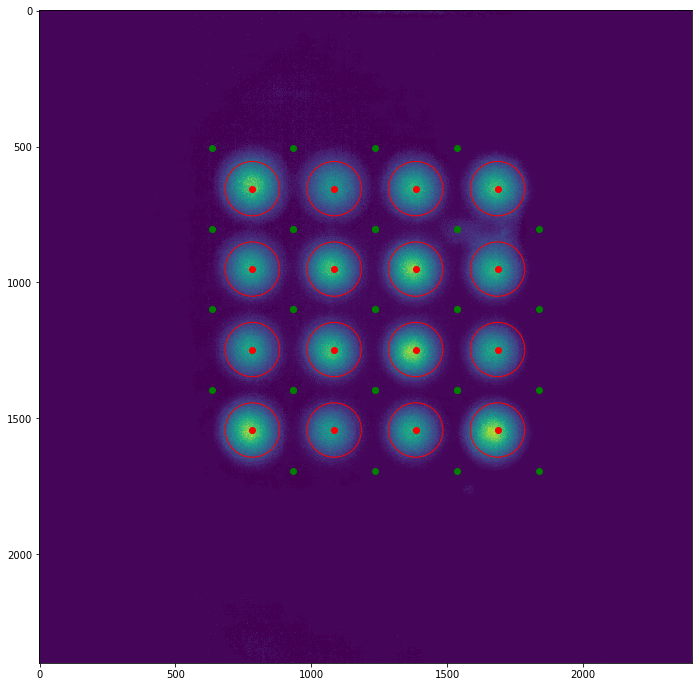

In [30]:
sample_im = np.array(Image.open(r"F:\device\optics\images\190618_100장\Desktop\100장\2m (q7 빠짐)\0_0_f.jpg"))
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(sample_im.sum(axis=2))
# rect = patches.Rectangle((minc-50, minr-50), maxc-minc+50, maxr-minc, edgecolor='red', facecolor='none')
# ax.add_patch(rect)
for pts in grid.values():
    ax.scatter(pts[1], pts[0], c='g')
    ax.scatter(pts[3], pts[2], c='g')
    cent_y = int((pts[3] + pts[1])/2)
    cent_x = int((pts[2] + pts[0])/2)
    print(cent_y, cent_x)
    ax.scatter(cent_y, cent_x, c='r')
    circ = patches.Circle((cent_y, cent_x), radius=100, color='r', fill=False, linewidth=1)
    ax.add_patch(circ)

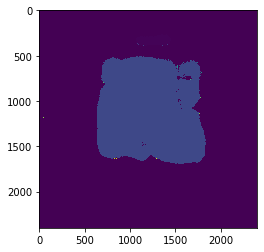

In [18]:
plt.imshow(region._label_image)

In [19]:
(cent_y, cent_x)

(1685, 1543)

In [20]:
def create_circular_mask(h, w, center, radius):
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

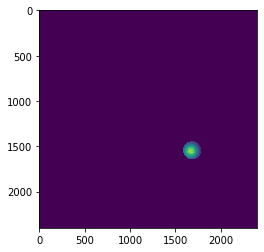

In [29]:
h, w, _ = sample_im.shape
mask = create_circular_mask(h, w, (cent_y, cent_x), 100)
masked_img = sample_im.sum(axis=2).copy()
masked_img[~mask] = 0
plt.imshow(masked_img)

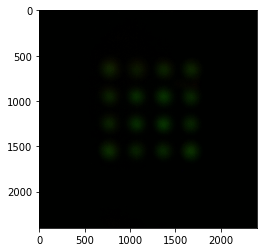

In [25]:
plt.imshow(sample_im)